# Prediction of having a diabetes

## 1. Desribtion of choosen dataset

Pregnancies: Number of times a woman has been pregnant <br>
Glucose: Plasma Glucose concentration of 2 hours in an oral glucose tolerance test <br>
BloodPressure: Diastollic Blood Pressure (mm hg) <br>
SkinThickness: Triceps skin fold thickness(mm) <br>
Insulin: 2 hour serum insulin(mu U/ml) <br>
BMI: Body Mass Index ((weight in kg/height in m)^2) <br>
Age: Age (years) <br>
DiabetesPedigreeFunction: scores likelihood of diabetes based on family history <br>
Outcome: 0(doesn't have diabetes) or 1 (has diabetes) <br>

In [1]:
#importation of needen libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
import seaborn as sns
from sklearn.metrics import accuracy_score
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from matplotlib.pyplot import figure

## 2. Importation of dateset and getting know with it

In [2]:
data1=pd.read_csv("~/Documents/BOML/diabetes_2.csv")
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that in 4 of 8 columns (Glucose, BloodPressure, SkinThickness, MBI) there exist minimum value equals to 0 which is medicaly impossible. Hence we are going to replace it with a mean value if the column. We should also pay attention at coulumn BloodPressure where exist samples with blood pressure under 50 which is impossible to human being (these woman ought to not be living).

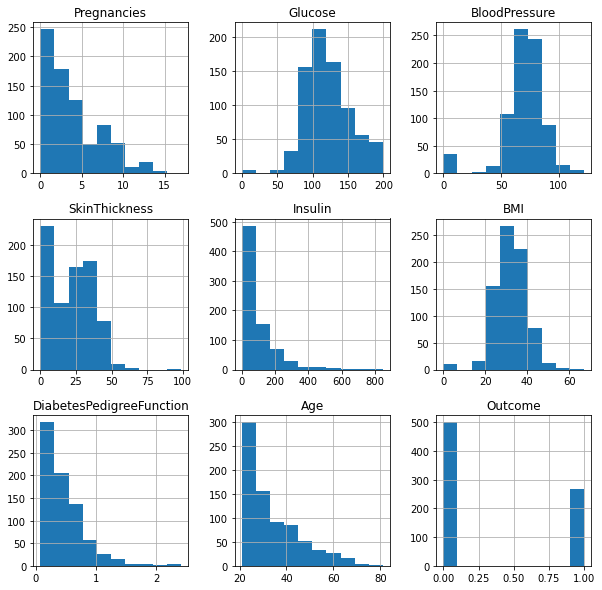

In [6]:
#histogram for each  feature
data1.hist(bins=10,figsize=(10,10))
plt.show()

### 3. Preapering the dataset

In [7]:
data1=data1.drop_duplicates() #removing duplicates if they exist

In [8]:
data1.isnull().sum() #checking if there is some missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#removing samples which have value in BloodPressure column between 0 (not included) and 50

data1=data1.loc[(data1['BloodPressure']==0) | (data1['BloodPressure']>50),:]

In [10]:
#checking for 0 values in these columns which have minimum 0 value

print(data1[data1['BloodPressure']==0].shape[0])
print(data1[data1['Glucose']==0].shape[0])
print(data1[data1['SkinThickness']==0].shape[0])
print(data1[data1['Insulin']==0].shape[0])
print(data1[data1['BMI']==0].shape[0])

35
4
225
368
11


We are going to replace each 0 value in each column by the given distribution. If the distribiution is normal (skewed), we will use mean value (median).

In [11]:
#replacing 0 values with median or mean value

data1['Glucose']=data1['Glucose'].replace(0,data1['Glucose'].mean()) #normal distribution
data1['BloodPressure']=data1['BloodPressure'].replace(0,data1['BloodPressure'].mean()) #normal distribution
data1['SkinThickness']=data1['SkinThickness'].replace(0,data1['SkinThickness'].median()) #skewed distribution
data1['Insulin']=data1['Insulin'].replace(0,data1['Insulin'].median()) #skewed distribution
data1['BMI']=data1['BMI'].replace(0,data1['BMI'].median()) #skewed distribution

In [12]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,739.000000,739.00000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,3.912043,121.90119,73.347888,27.407307,85.998647,32.503383,0.468379,33.480379,0.351827
std,3.395614,30.36769,11.010592,9.177887,110.496643,6.829245,0.326321,11.812472,0.477864
min,0.000000,44.00000,52.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,66.000000,23.000000,15.000000,27.600000,0.240500,24.000000,0.000000
50%,3.000000,117.00000,72.000000,23.000000,15.000000,32.200000,0.368000,29.000000,0.000000
75%,6.000000,141.00000,80.000000,32.000000,126.000000,36.600000,0.617000,41.000000,1.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data1_category=data1.Outcome #given predictions
data1=data1.drop(['Outcome'], axis = 'columns')

## 4. Normalization


In [14]:
def minmax(A) :
    c = (A - A.min())/(A.max() - A.min())
    return c

In [15]:
data1 = minmax(data1)
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.285714,0.304348,0.001202,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.200000,0.239130,0.001202,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.171429,0.173913,0.001202,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.200000,0.173913,0.096154,0.202454,0.038002,0.000000
5,0.294118,0.464516,0.314286,0.173913,0.001202,0.151329,0.052519,0.150000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.342857,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.257143,0.217391,0.001202,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.285714,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.114286,0.173913,0.001202,0.243354,0.115713,0.433333


## 5. Spliting the dataset

In [16]:
#splitting data in 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(data1,data1_category,test_size=0.2,random_state=0)

In [17]:
X_train.shape,y_train.shape

((591, 8), (591,))

In [18]:
X_test.shape,y_test.shape

((148, 8), (148,))

In [19]:
X_train.shape[1]

8

## 6. Choosing the most important features by random forest classifier

 1) Glucose                        0.248611
 2) BMI                            0.168792
 3) Age                            0.140758
 4) DiabetesPedigreeFunction       0.128882
 5) BloodPressure                  0.087374
 6) Pregnancies                    0.087274
 7) SkinThickness                  0.069736
 8) Insulin                        0.068573


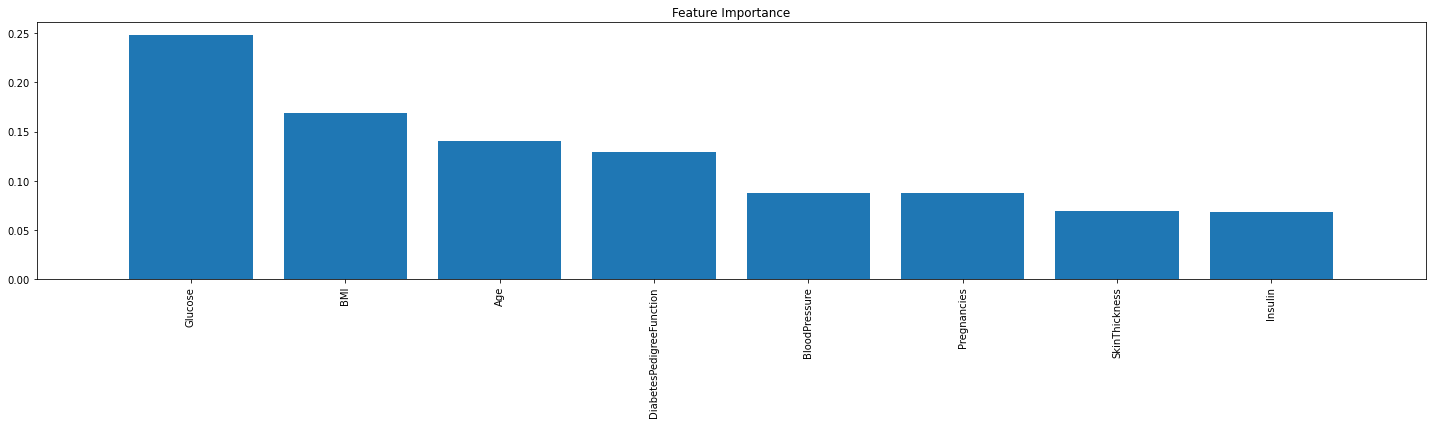

In [20]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data1.columns

forest = RandomForestClassifier(n_estimators=1000,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

figure(num=1, figsize=(20, 6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

For next examine we will only focus on features that importance is more than 0.1 which is Glucose, BMI, Age and DiabetesPedigreeFunction.

In [21]:
X_train = X_train.drop(['BloodPressure','Pregnancies','SkinThickness','Insulin'], axis = 'columns')
X_test = X_test.drop(['BloodPressure','Pregnancies','SkinThickness','Insulin'], axis = 'columns')

In [22]:
X_train.describe()

,Glucose,BMI,DiabetesPedigreeFunction,Age
count,591.000000,591.000000,591.000000,591.000000
mean,0.504063,0.293025,0.170718,0.202707
std,0.194716,0.142361,0.141865,0.189782
min,0.000000,0.000000,0.000000,0.000000
25%,0.361290,0.192229,0.071307,0.050000
50%,0.477419,0.286299,0.129377,0.133333
75%,0.625806,0.380368,0.237404,0.325000
max,0.993548,1.000000,1.000000,1.000000


## 7. Classification Algorithms

### 7.1. Logistic Regression

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


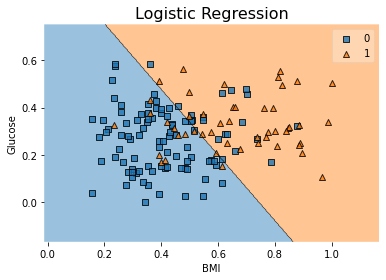

In [23]:
from sklearn.linear_model import LogisticRegression

lr_plot = LogisticRegression(C = 50, max_iter = 1000, class_weight = 'balanced')
lr_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_test.iloc[:,[0,1]]), np.asarray(y_test), lr_plot, zoom_factor = 6)
plt.title('Logistic Regression', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

In [24]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(C = 50, max_iter = 1000, class_weight = 'balanced')
lr.fit(X_train, y_train)

pred_test = lr.predict(X_test)

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

0.7635135135135135


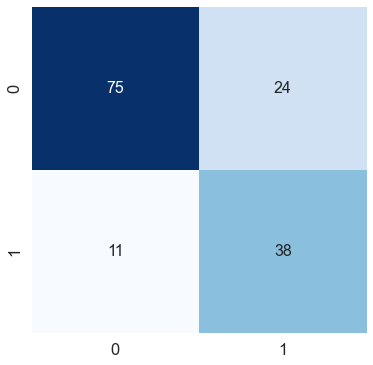

In [25]:
conf_matrix(y_test, pred_test)

train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.61      0.78      0.68        49

    accuracy                           0.76       148
   macro avg       0.74      0.77      0.75       148
weighted avg       0.79      0.76      0.77       148


 F1:
 0.6846846846846848

 Precision score is:
 0.6129032258064516

 Recall score is:
 0.7755102040816326


### 7.2. KNN

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


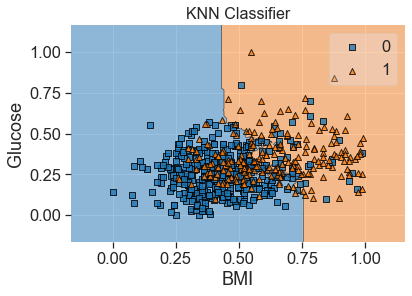

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_plot = KNeighborsClassifier(n_neighbors = 21, p = 1, metric = 'minkowski')
knn_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = knn_plot, zoom_factor = 6)
plt.title('KNN Classifier', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.7905405405405406


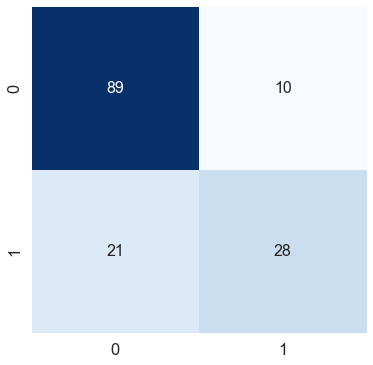

In [28]:
knn = KNeighborsClassifier(n_neighbors = 21, p = 1, metric = 'minkowski')
knn.fit(X_train, y_train)
pred_test = knn.predict(X_test)

conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [29]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.74      0.57      0.64        49

    accuracy                           0.79       148
   macro avg       0.77      0.74      0.75       148
weighted avg       0.79      0.79      0.78       148


 F1:
 0.6436781609195403

 Precision score is:
 0.7368421052631579

 Recall score is:
 0.5714285714285714


### 7.3. Decision Tree

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


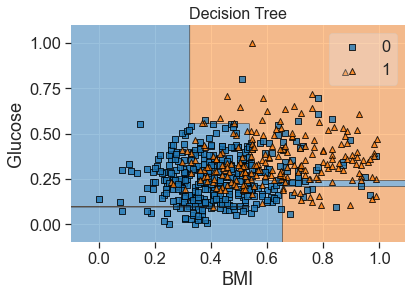

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model_plot = DecisionTreeClassifier(criterion = 'gini', 
                                    max_depth = 4, 
                                    random_state = 1,
                                    class_weight='balanced')
tree_model_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = tree_model_plot, zoom_factor = 10)
plt.title('Decision Tree', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.7364864864864865


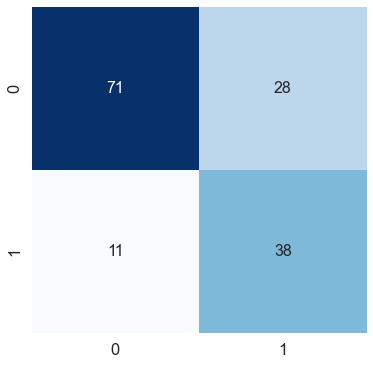

In [31]:
tree_model = DecisionTreeClassifier(criterion = 'gini', 
                                    max_depth = 4, 
                                    random_state = 1,
                                    class_weight='balanced')
tree_model.fit(X_train, y_train)
pred_test = tree_model.predict(X_test)

conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [32]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.72      0.78        99
           1       0.58      0.78      0.66        49

    accuracy                           0.74       148
   macro avg       0.72      0.75      0.72       148
weighted avg       0.77      0.74      0.74       148


 F1:
 0.6608695652173914

 Precision score is:
 0.5757575757575758

 Recall score is:
 0.7755102040816326


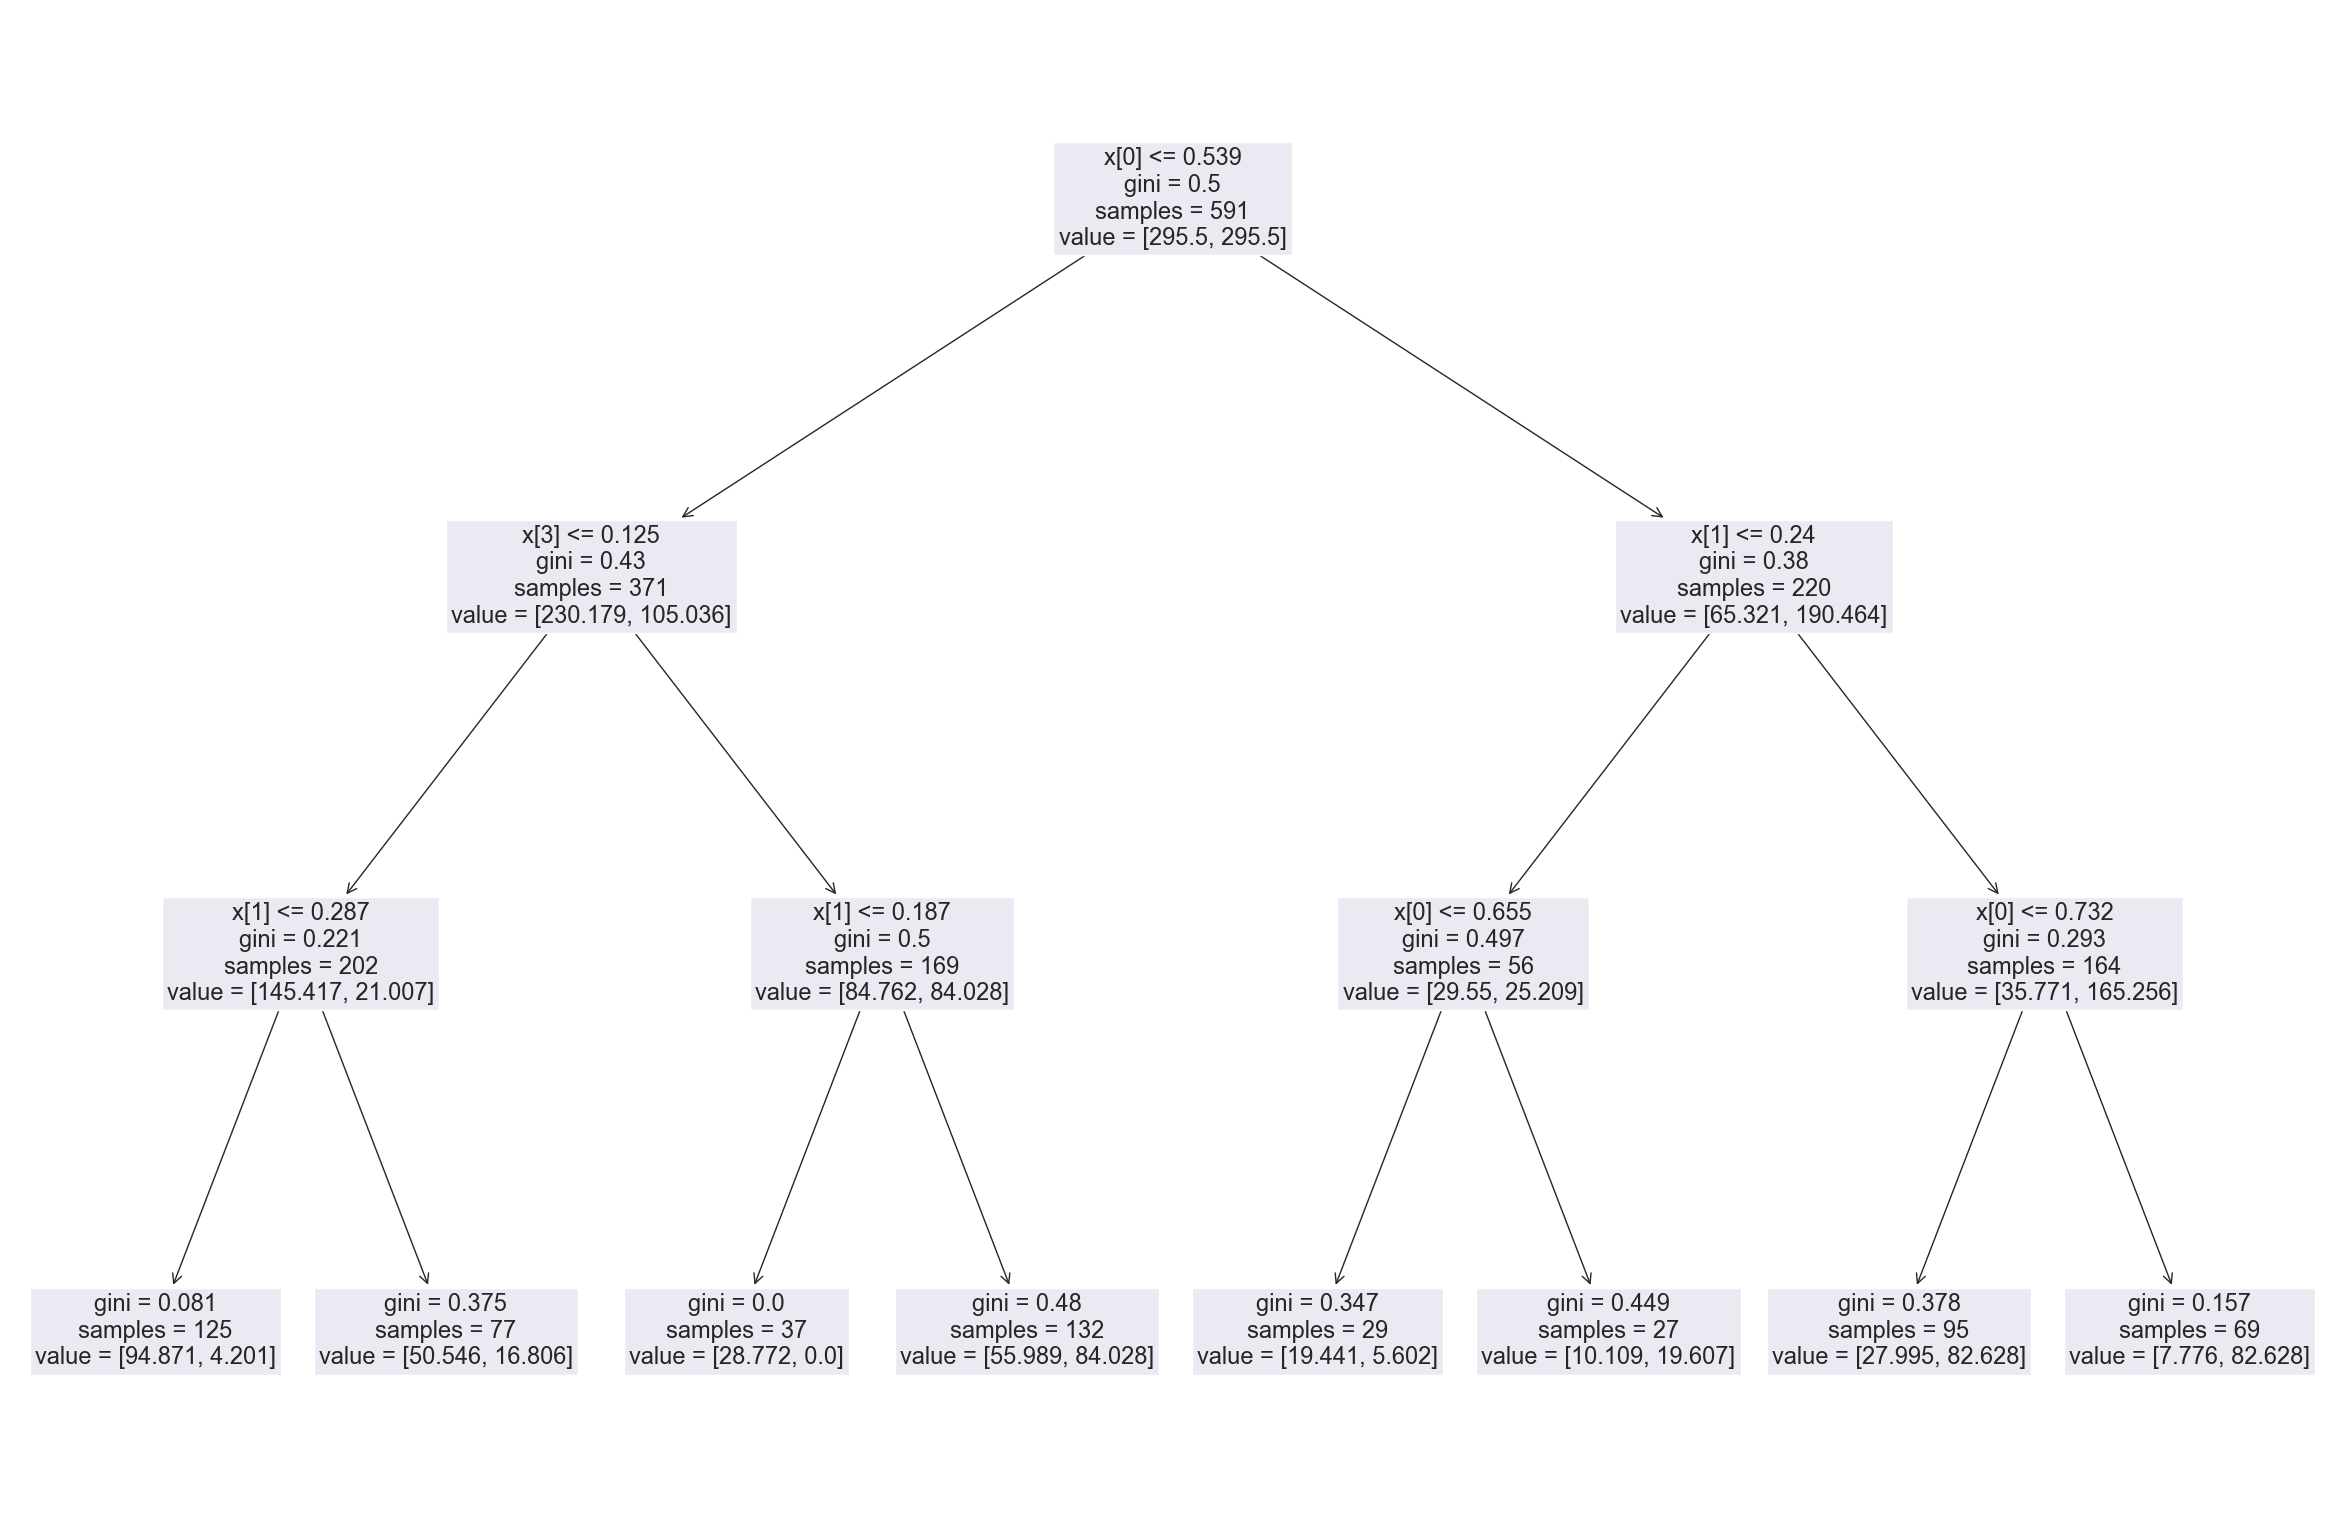

In [33]:
from sklearn import tree
from matplotlib.pyplot import figure

model = DecisionTreeClassifier(max_depth = 3,
                               criterion = 'gini',
                               class_weight = 'balanced')
model.fit(X_train,y_train)
figure(figsize=(30, 20), dpi=100)
tree.plot_tree(model)
plt.show()

### 7.4. RandomForest

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


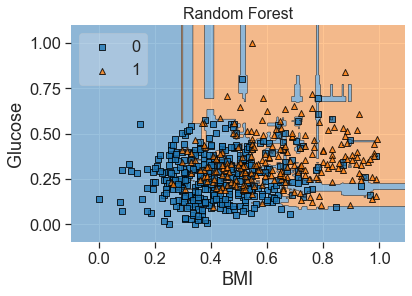

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_plot = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 13,
                                random_state = 1,
                                n_jobs = 2)
forest_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = forest_plot, legend = 2, zoom_factor = 10)
plt.title('Random Forest', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.7702702702702703


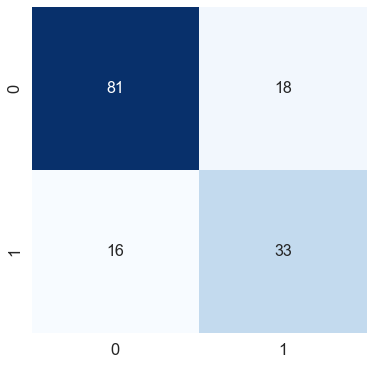

In [35]:
forest = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 13,
                                random_state = 1,
                                n_jobs = 2)
forest.fit(X_train, y_train)

pred_test = forest.predict(X_test)

conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [36]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.65      0.67      0.66        49

    accuracy                           0.77       148
   macro avg       0.74      0.75      0.74       148
weighted avg       0.77      0.77      0.77       148


 F1:
 0.66

 Precision score is:
 0.6470588235294118

 Recall score is:
 0.673469387755102


### 7.5. SVM

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


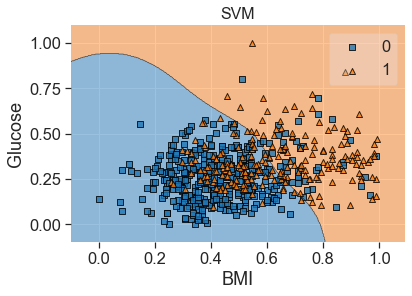

In [37]:
from sklearn.svm import SVC

svm_plot = SVC(kernel = 'rbf', C = 2.0)
svm_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = svm_plot, zoom_factor = 10)
plt.title('SVM', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.7905405405405406


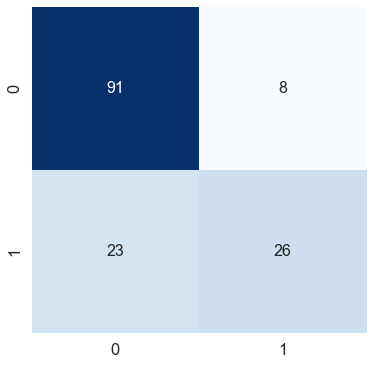

In [38]:
svm = SVC(kernel = 'rbf', C = 2.0)
svm.fit(X_train, y_train)

pred_test = svm.predict(X_test)

conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [39]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        99
           1       0.76      0.53      0.63        49

    accuracy                           0.79       148
   macro avg       0.78      0.72      0.74       148
weighted avg       0.79      0.79      0.78       148


 F1:
 0.6265060240963856

 Precision score is:
 0.7647058823529411

 Recall score is:
 0.5306122448979592


## 8 Connecting classifiers by majority voting and boosting
#### 8.1 Majority voting

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

clf1 = LogisticRegression(C = 50, max_iter = 10000, class_weight = 'balanced')

clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, class_weight = 'balanced')

clf3 = KNeighborsClassifier(n_neighbors = 21, p = 1, metric = 'minkowski')

clf4 = SVC(kernel = 'rbf', C = 2.0)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'SVC']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, clf4, ], clf_labels):
    scores = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10, scoring = 'roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.83 (+/- 0.05) [Logistic regression]
ROC AUC: 0.80 (+/- 0.04) [Decision tree]
ROC AUC: 0.84 (+/- 0.05) [KNN]
ROC AUC: 0.82 (+/- 0.06) [SVC]


/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


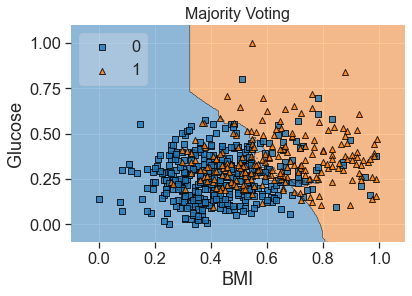

In [41]:
from sklearn.ensemble import VotingClassifier

mv_clf_plot = VotingClassifier(estimators = [('Logistic regression', pipe1), ('Decision tree', clf2), ('KNN', pipe3), ('SVC', clf4)],
                          voting = 'hard')
mv_clf_plot.fit(X_train.iloc[:,[0,1]], y_train)

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = mv_clf_plot, legend = 2, zoom_factor = 10)
plt.title('Majority Voting', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.8175675675675675


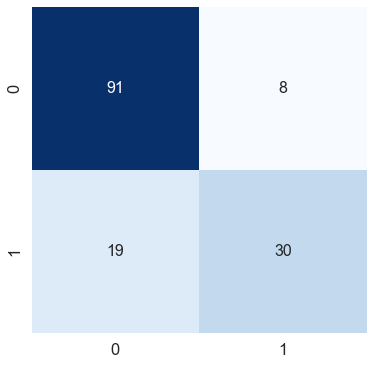

In [42]:
mv_clf = VotingClassifier(estimators = [('Logistic regression', pipe1), ('Decision tree', clf2), ('KNN', pipe3), ('SVC', clf4)],
                          voting = 'hard')
mv_clf.fit(X_train, y_train)

pred_test = mv_clf.predict(X_test)

conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [43]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        99
           1       0.79      0.61      0.69        49

    accuracy                           0.82       148
   macro avg       0.81      0.77      0.78       148
weighted avg       0.81      0.82      0.81       148


 F1:
 0.6896551724137931

 Precision score is:
 0.7894736842105263

 Recall score is:
 0.6122448979591837


### 8.2 AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

tree_model = DecisionTreeClassifier(criterion = 'gini', 
                                    max_depth = 13,
                                    class_weight='balanced')

ada = AdaBoostClassifier(base_estimator = tree_model,
                         n_estimators = 100, 
                         learning_rate = 0.1)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=13)

In [45]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.993/0.709
AdaBoost train/test accuracies 1.000/0.777


/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## 9 XGBoost

In [46]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/dawidcioch/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


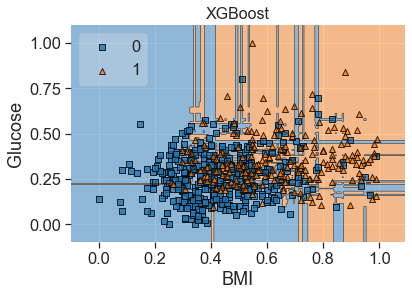

In [47]:
clf_plot = XGBClassifier(learning_rate = 0.1, 
                    n_estimators = 10000, 
                    use_label_encoder = False,
                    random_state = 1)
    
clf_plot.fit(X_train.iloc[:,[0,1]], y_train, eval_metric = 'logloss')

plot_decision_regions(np.asarray(X_train.iloc[:,[0,1]]), np.asarray(y_train), clf = clf_plot, legend = 2, zoom_factor = 10)
plt.title('XGBoost', size=16)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show()

0.8175675675675675


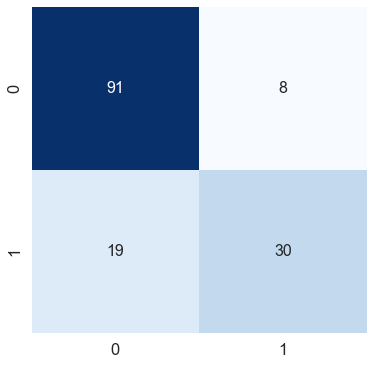

In [48]:
clf = XGBClassifier(learning_rate = 0.1, 
                    n_estimators = 10000, 
                    use_label_encoder = False,
                    random_state = 1)
    
clf.fit(X_train, y_train, eval_metric = 'logloss')

predictions = clf.predict(X_test) 
conf_matrix(y_test, pred_test)
train_score = accuracy_score(y_test, pred_test)
print(train_score)

In [49]:
print("Classification Report is:\n",classification_report(y_test, pred_test))
print("\n F1:\n",f1_score(y_test,pred_test))
print("\n Precision score is:\n",precision_score(y_test,pred_test))
print("\n Recall score is:\n",recall_score(y_test,pred_test))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        99
           1       0.79      0.61      0.69        49

    accuracy                           0.82       148
   macro avg       0.81      0.77      0.78       148
weighted avg       0.81      0.82      0.81       148


 F1:
 0.6896551724137931

 Precision score is:
 0.7894736842105263

 Recall score is:
 0.6122448979591837
